In [1]:
import make_query, queries, utils
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
query = queries.day_data(0)
print(query)



    query uniswapDayDatas {
        uniswapDayDatas(first: 100, skip: 0, where: { date_gt: 1543640400}, orderBy: date, orderDirection: asc) {
            id
            date
            dailyVolumeETH
            dailyVolumeUntracked
            totalVolumeUSD
            totalLiquidityUSD
            mostLiquidTokens{
                token{
                    name
                }
                dailyTxns
            }
            txCount
        }
    }
    


In [3]:
req = make_query.make_request(queries.UNISWAP_URL, query)
req

{'data': {'uniswapDayDatas': [{'id': '18387',
    'date': 1588636800,
    'dailyVolumeETH': '0',
    'dailyVolumeUntracked': '0.005465696446346381083685932486680732',
    'totalVolumeUSD': '0',
    'totalLiquidityUSD': '0.9889999999999999999999999999999999',
    'mostLiquidTokens': [],
    'txCount': '3'},
   {'id': '18388',
    'date': 1588723200,
    'dailyVolumeETH': '0',
    'dailyVolumeUntracked': '0.00152961178082324924069982475906929',
    'totalVolumeUSD': '0',
    'totalLiquidityUSD': '3.205901078245611864832838471153563',
    'mostLiquidTokens': [],
    'txCount': '8'},
   {'id': '18389',
    'date': 1588809600,
    'dailyVolumeETH': '0',
    'dailyVolumeUntracked': '0',
    'totalVolumeUSD': '0',
    'totalLiquidityUSD': '3.205904320817102476152628363677479',
    'mostLiquidTokens': [],
    'txCount': '10'},
   {'id': '18390',
    'date': 1588896000,
    'dailyVolumeETH': '0',
    'dailyVolumeUntracked': '0',
    'totalVolumeUSD': '0',
    'totalLiquidityUSD': '18.8156724054

In [4]:
print(list(req["data"].keys())[0])
req["data"][list(req["data"].keys())[0]]


uniswapDayDatas


[{'id': '18387',
  'date': 1588636800,
  'dailyVolumeETH': '0',
  'dailyVolumeUntracked': '0.005465696446346381083685932486680732',
  'totalVolumeUSD': '0',
  'totalLiquidityUSD': '0.9889999999999999999999999999999999',
  'mostLiquidTokens': [],
  'txCount': '3'},
 {'id': '18388',
  'date': 1588723200,
  'dailyVolumeETH': '0',
  'dailyVolumeUntracked': '0.00152961178082324924069982475906929',
  'totalVolumeUSD': '0',
  'totalLiquidityUSD': '3.205901078245611864832838471153563',
  'mostLiquidTokens': [],
  'txCount': '8'},
 {'id': '18389',
  'date': 1588809600,
  'dailyVolumeETH': '0',
  'dailyVolumeUntracked': '0',
  'totalVolumeUSD': '0',
  'totalLiquidityUSD': '3.205904320817102476152628363677479',
  'mostLiquidTokens': [],
  'txCount': '10'},
 {'id': '18390',
  'date': 1588896000,
  'dailyVolumeETH': '0',
  'dailyVolumeUntracked': '0',
  'totalVolumeUSD': '0',
  'totalLiquidityUSD': '18.81567240547130278983503413202888',
  'mostLiquidTokens': [],
  'txCount': '18'},
 {'id': '18393',

In [2]:

timestamp = queries.UNISWAP_START
skip_amt = 0

while timestamp < 1648353600:
    query = queries.day_data(skip_amt)
    req = make_query.make_request(queries.UNISWAP_URL, query)
    
    if timestamp == queries.UNISWAP_START:
        df = utils.convert_to_Dataframe(req)
    else:
        df = pd.concat([df, utils.convert_to_Dataframe(req)],
                       ignore_index=True)
        print("Dataframe of Size:", df.shape)
    
    skip_amt = df.shape[0]
        
    
    timestamp = utils.add_unix_day(timestamp, 100)




Dataframe of Size: (200, 9)
Dataframe of Size: (300, 9)
Dataframe of Size: (400, 9)
Dataframe of Size: (500, 9)
Dataframe of Size: (600, 9)
Dataframe of Size: (690, 9)
Dataframe of Size: (690, 9)
Dataframe of Size: (690, 9)
Dataframe of Size: (690, 9)
Dataframe of Size: (690, 9)
Dataframe of Size: (690, 9)
Dataframe of Size: (690, 9)


In [3]:
df = df.sort_values(by=['date'])
df


,id,date,dailyVolumeETH,dailyVolumeUSD,dailyVolumeUntracked,totalVolumeUSD,totalLiquidityUSD,mostLiquidTokens,txCount
0,18387,1588636800,0,0,0.005465696446346381083685932486680732,0,0.9889999999999999999999999999999999,[],3
1,18388,1588723200,0,0,0.00152961178082324924069982475906929,0,3.205901078245611864832838471153563,[],8
2,18389,1588809600,0,0,0,0,3.205904320817102476152628363677479,[],10
3,18390,1588896000,0,0,0,0,18.81567240547130278983503413202888,[],18
4,18393,1589155200,0,0,0.198474744986308249812646943058877,0,18.75575726469834827925495451505825,[],21
...,...,...,...,...,...,...,...,...,...
685,19074,1647993600,50853.91952404262027371457683482586,151311004.5603196600638749836778698,519095924.8857077584646770832812455,0,2860078119.679289502568421553031464,[],75945223
686,19075,1648080000,47359.48760769038700781743915516096,145365707.0210102371053399101687451,1360154208.568712307288782801895332,0,2924261792.504012304655426535150039,[],76006500
687,19076,1648166400,51079.80526400060660524986391099087,159879979.95951898330426024433683,421952460.0458024037293023831851573,0,2907021438.18980579655363780059369,[],76070091
688,19077,1648252800,44732.46941460331186721478057307329,139675406.1145729040440610681751264,1496712254.80143203820547003061426,0,2945779273.477226155103530544899271,[],76128316


In [4]:
for i in range(689):
    #print(list(df["date"]))
    
    if df["date"][i+1]-df["date"][i] != 86400:
        print(df["date"][i], df["date"][i+1])


1588896000 1589155200


In [12]:
df.dtypes

id                       object
date                      int64
dailyVolumeETH          float64
dailyVolumeUSD          float64
dailyVolumeUntracked    float64
totalVolumeUSD           object
totalLiquidityUSD        object
mostLiquidTokens         object
txCount                   int64
dtype: object

In [13]:
df["txCount"] = pd.to_numeric(df["txCount"])
df["dailyVolumeETH"] = pd.to_numeric(df["dailyVolumeETH"])
df["dailyVolumeUSD"] = pd.to_numeric(df["dailyVolumeUSD"])
df["totalLiquidityUSD"] = pd.to_numeric(df["totalLiquidityUSD"])
df["dailyVolumeUntracked"] = pd.to_numeric(df["dailyVolumeUntracked"])


<AxesSubplot:title={'center':'Transactions and ETH Volume over Time'}, xlabel='date'>

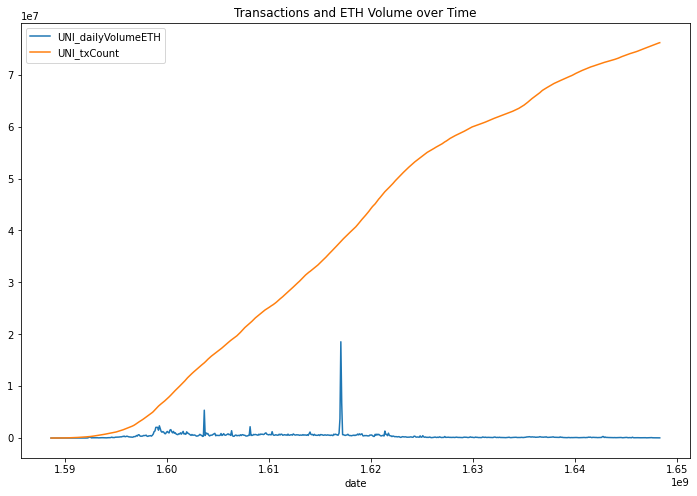

In [16]:
fig, axs = plt.subplots(figsize=(12, 8))
plt.title("Transactions and ETH Volume over Time")
df.plot(x="date", y="dailyVolumeETH", ax=axs, label="UNI_dailyVolumeETH")
df.plot(x="date", y="txCount", ax=axs, label="UNI_txCount")


Text(0.5, 1.0, 'Liquidity and Volume over Time')

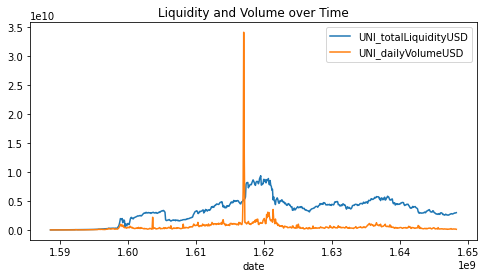

In [18]:
fig, axs = plt.subplots(figsize=(8, 4))
df.plot(x="date", y="totalLiquidityUSD", ax=axs, label="UNI_totalLiquidityUSD")
df.plot(x="date", y="dailyVolumeUSD", ax=axs, label="UNI_dailyVolumeUSD")

plt.title("Liquidity and Volume over Time")


In [19]:
df.to_csv("Daily_TxStats.csv")

In [20]:
## WORKING WITH UNISWAP Factory now

block = 6500000

while block < 14469749:
    query = queries.factory_data(block)
    req = make_query.make_request(queries.UNISWAP_URL, query)

    if block == 6500000:
        df = utils.convert_to_Dataframe(req)
    else:
        df = pd.concat([df, utils.convert_to_Dataframe(req)],
                       ignore_index=True)
        #print("Dataframe of Size:", df.shape)
        print("Block: ", max(df[""]))

    block+=6000


Dataframe of Size: (2, 8)
Dataframe of Size: (3, 8)
Dataframe of Size: (4, 8)
Dataframe of Size: (5, 8)
Dataframe of Size: (6, 8)
Dataframe of Size: (7, 8)
Dataframe of Size: (8, 8)
Dataframe of Size: (9, 8)
Dataframe of Size: (10, 8)
Dataframe of Size: (11, 8)
Dataframe of Size: (12, 8)
Dataframe of Size: (13, 8)
Dataframe of Size: (14, 8)
Dataframe of Size: (15, 8)
Dataframe of Size: (16, 8)
Dataframe of Size: (17, 8)
Dataframe of Size: (18, 8)
Dataframe of Size: (19, 8)
Dataframe of Size: (20, 8)
Dataframe of Size: (21, 8)
Dataframe of Size: (22, 8)
Dataframe of Size: (23, 8)
Dataframe of Size: (24, 8)
Dataframe of Size: (25, 8)
Dataframe of Size: (26, 8)
Dataframe of Size: (27, 8)
Dataframe of Size: (28, 8)
Dataframe of Size: (29, 8)
Dataframe of Size: (30, 8)
Dataframe of Size: (31, 8)
Dataframe of Size: (32, 8)
Dataframe of Size: (33, 8)
Dataframe of Size: (34, 8)
Dataframe of Size: (35, 8)
Dataframe of Size: (36, 8)
Dataframe of Size: (37, 8)
Dataframe of Size: (38, 8)
Dataframe

In [21]:
df = df.drop_duplicates()
df.shape

(19, 8)

In [22]:
df

,id,totalVolumeUSD,totalVolumeETH,untrackedVolumeUSD,totalLiquidityUSD,totalLiquidityETH,txCount,pairCount
0,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569337593.9326462145065778618324,276673332.4932359301300150671668373,273302839978071412085.1852345102493,2980394425.752476651405785059595848,936009.7753399760143028177951612431,76178908,67729
27,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569337848.9356005151369123057636,276673332.5733210544020150671668373,273302839978071412403.5245857119848,2980395063.1243382276743239303419,936009.9755102245583028177951612431,76178910,67729
132,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569369086.9784343036885834829043,276673342.3833679874306192503765297,273302839978071443898.1323705773247,2980622414.235662433412856253853541,936001.0059296383825635206194315258,76178923,67729
247,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569348134.7356654308042678966011,276673335.80362059806116745536788,273302839978071422942.3004995573896,2980412537.810185101947566795300144,936001.2482259803371179041337552674,76178920,67729
256,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569369840.4967284311190305991642,276673342.6200246420319724543765297,273302839978071445865.8625162964172,2980622640.243412740609520909617123,936001.0769025602209970166194315258,76178929,67729
299,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569384502.0463385231640026199151,276673347.2243286549530963237864893,273302839978071464441.245819752736,2980417876.809012989850708260255798,935998.9153927703448271966194315258,76178940,67729
313,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569385137.4553634954721263526109,276673347.423879220933013917415588,273302839978071490313.08595135776,2980410537.118046661145998285494524,935999.6256904534686274503355812747,76178946,67729
333,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569409774.4202063410793087575887,276673355.161132053675563446415588,273302839978071515485.5927485090091,2980459010.08824269383631077380954,936014.8486543353045092323355812747,76178950,67729
500,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569443047.5918804593792037214941,276673365.6109616733717164343758679,273302839978071554136.261259003208,2980316012.473141529529462211914008,936017.4274126281816912183355812747,76178973,67729
727,0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f,400569478377.3668168424875802548848,276673376.7068605339689650801068875,273302839978071591019.6572444494104,2979434044.99650651813521185734295,935740.4309716177335348291078777392,76178979,67729
